In [1]:
from Bio.PDB import *
from Bio.PDB import MMCIFParser
import numpy as np
import matplotlib.pyplot as plt

/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 245652.
  warnings.warn(
/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 245653.
  warnings.warn(
/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 245654.
  warnings.warn(
/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 245655.
  warnings.warn(
/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 108796.
  warnings.warn(
/home/csaylan/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D 

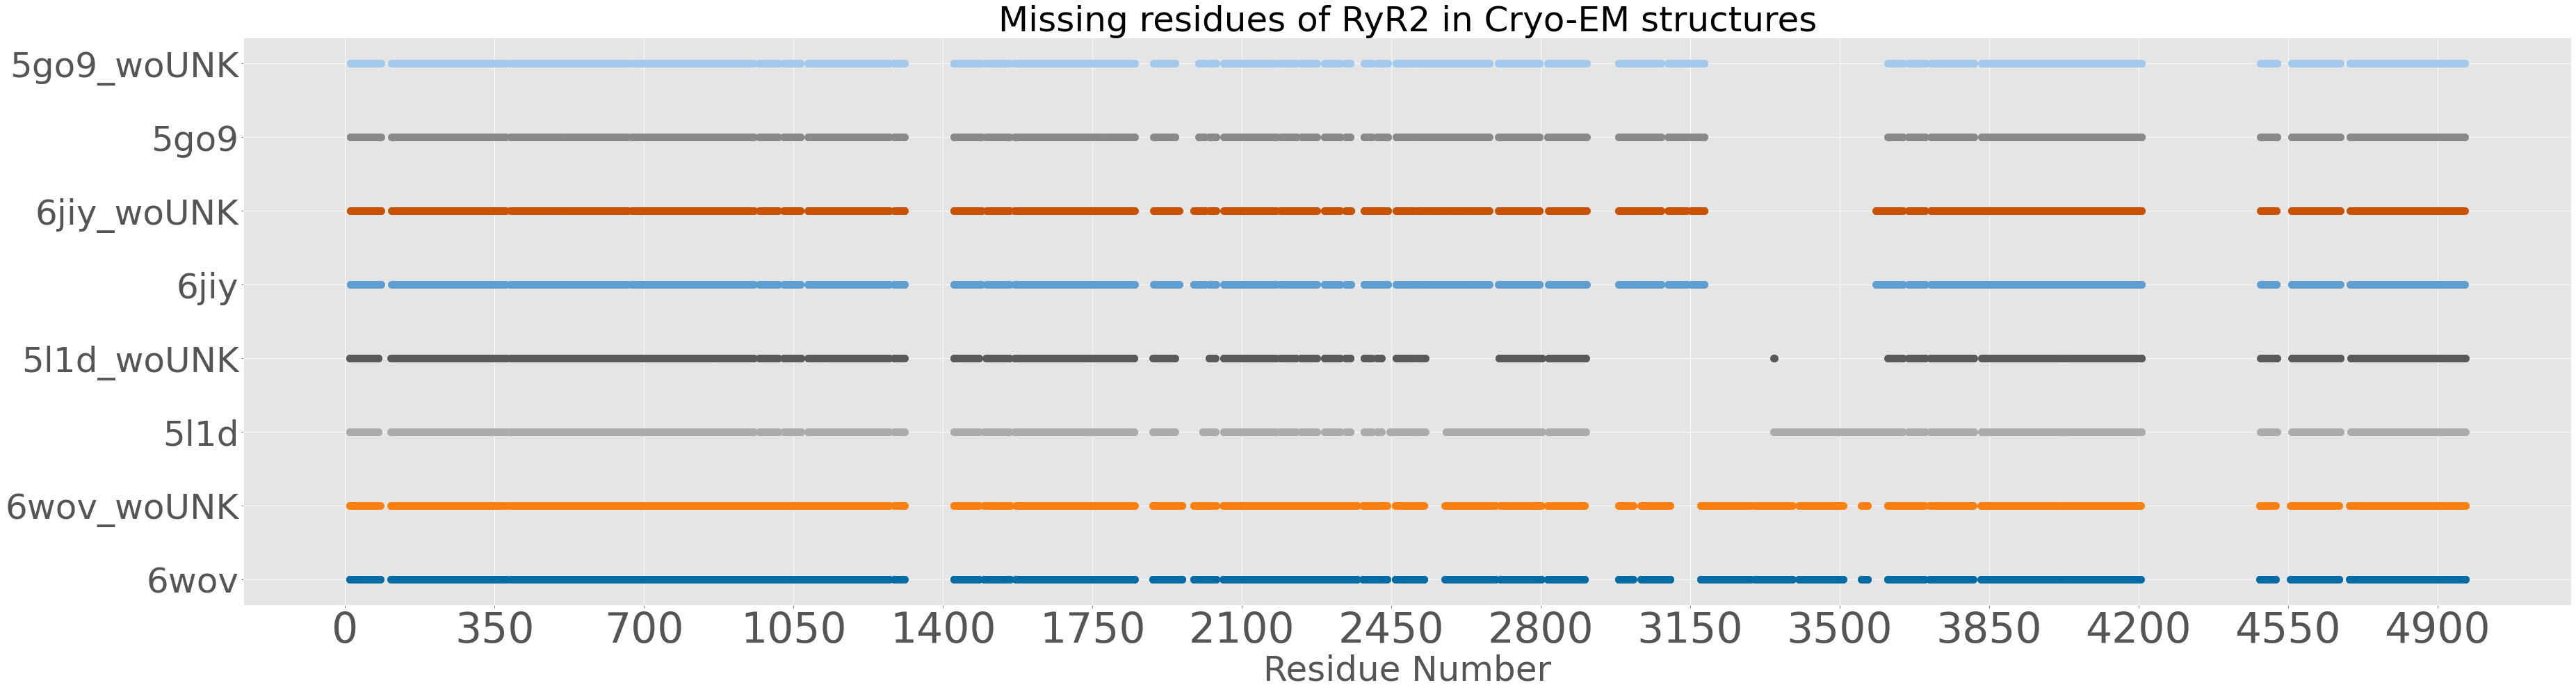

In [80]:
DIR = "/home/csaylan/Desktop/archive/Projects/RyR2/Data/cif/RyR2/"
CIF = ["6wov", "5l1d", "6jh6", "6jiy", "5go9"]

def ResidList(filename):
    parser = MMCIFParser()
    structure = parser.get_structure("name", f"{filename}.cif")
    reslist = []
    reslist_woUNK = []
    for residue in structure[0]["A"]:
        idx = residue.get_full_id()
        name = residue.get_resname()
        if idx[3][0] == " ":
            reslist.append(idx[3][1])
            if name != "UNK":
                reslist_woUNK.append(idx[3][1])   
    return reslist, reslist_woUNK


p6wov, p6wov_woUNK = ResidList(DIR+"6wov")
p5l1d, p5l1d_woUNK = ResidList(DIR+"5l1d")
p6jh6, p6jh6_woUNK = ResidList(DIR+"6jh6")
p6jiy, p6jiy_woUNK = ResidList(DIR+"6jiy")
p5go9, p5go9_woUNK = ResidList(DIR+"5go9")

def plotCIF(l, inc):
    y =  np.zeros(len(l))
    plt.scatter(l, y+inc, linewidths=5)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(60, 15))

l = [p6wov, p6wov_woUNK, 
     p5l1d, p5l1d_woUNK,
     p6jiy, p6jiy_woUNK,
     p5go9, p5go9_woUNK]

ticks  = ["", "6wov", "6wov_woUNK",
          "5l1d", "5l1d_woUNK",
          "6jiy", "6jiy_woUNK",
          "5go9", "5go9_woUNK"]

for i, name in enumerate(l):
    plotCIF(name, i)

ax.set_yticklabels(ticks)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 4996, 350))
ax.xaxis.set_tick_params(labelsize=60)
ax.yaxis.set_tick_params(labelsize=50)
plt.title("Missing residues of RyR2 in Cryo-EM structures", fontsize=50)
plt.xlabel("Residue Number", fontsize=50)
plt.savefig('miss_res.png', dpi=300)